In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
file_path = "Dry_Eye_Dataset.csv"
df = pd.read_csv(file_path)

print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(20000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel

In [3]:
# Encode categorical features
categorical_features = ['Gender', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day',
                        'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue',
                        'Ongoing medication', 'Smart device before bed', 'Blue-light filter',
                        'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']
#label_encoders = {}
#for col in categorical_features:
#    le = LabelEncoder()
#    df[col] = le.fit_transform(df[col])
#    label_encoders[col] = le

# Convert Blood Pressure into two separate numerical columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood pressure'], inplace=True)

# Define numerical features
numerical_features = ['Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Heart rate', 'Daily steps',
                      'Physical activity', 'Height', 'Weight', 'Average screen time', 'Systolic_BP', 'Diastolic_BP']

# Standardize numerical features
#scaler = StandardScaler()
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split data into features and target
X = df.drop(columns=['Dry Eye Disease'])
y = df['Dry Eye Disease']

#df.to_csv("Dry_Eye_Dataset_preprocessed.csv", index=False)



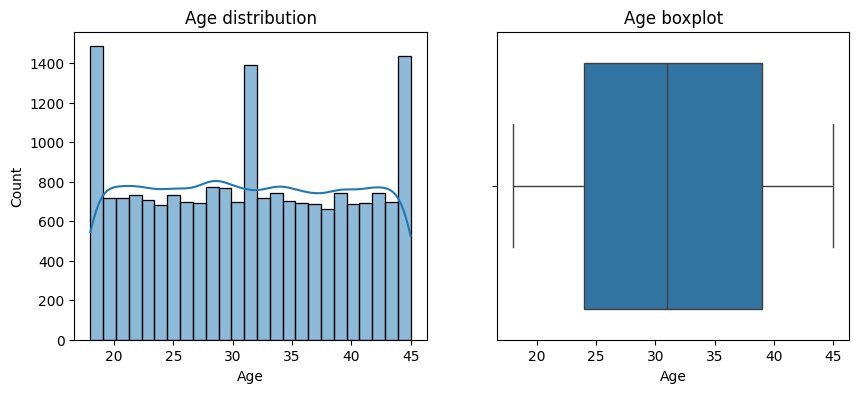

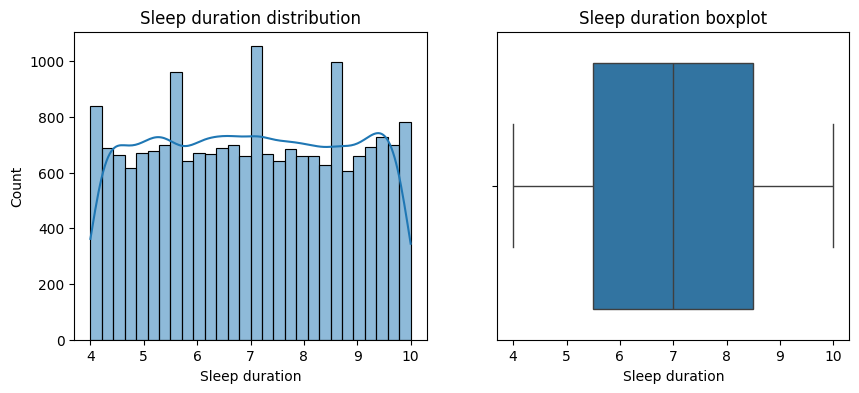

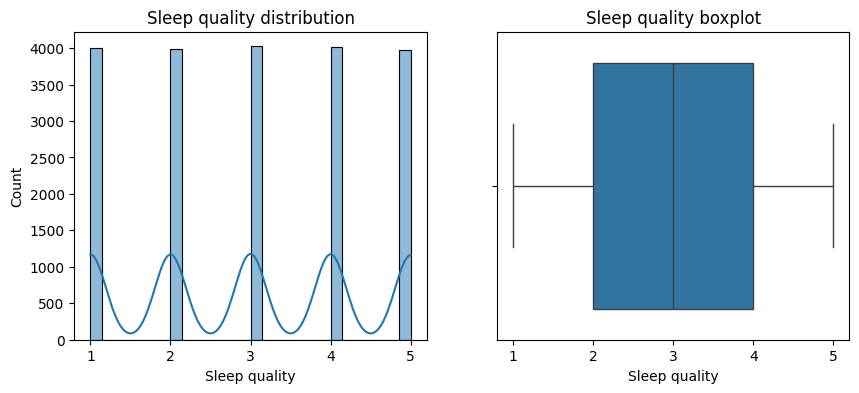

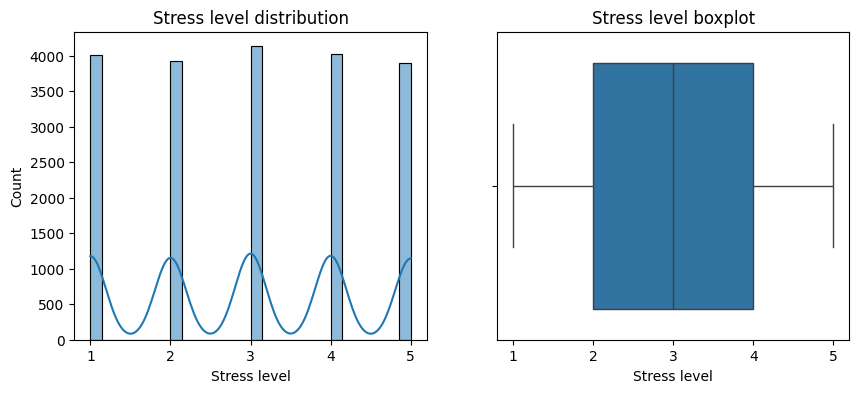

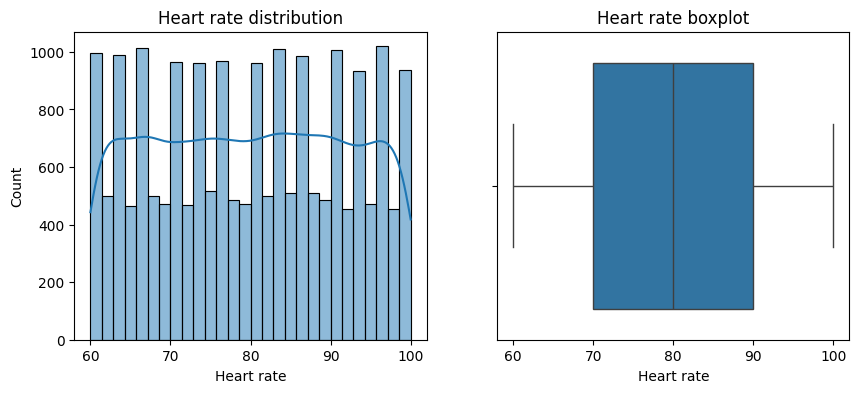

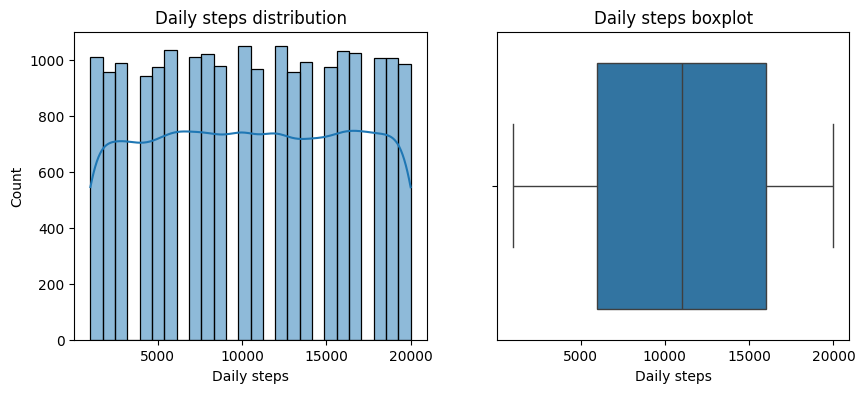

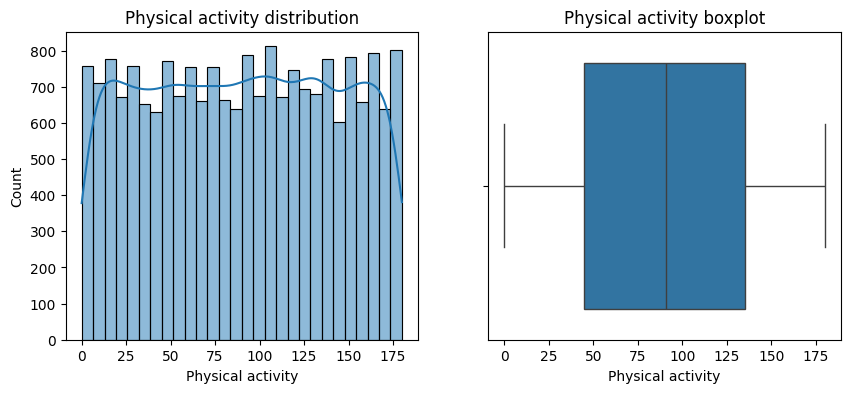

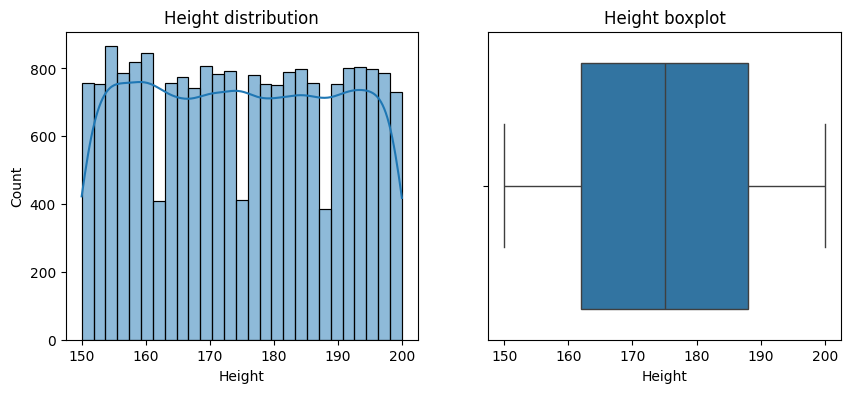

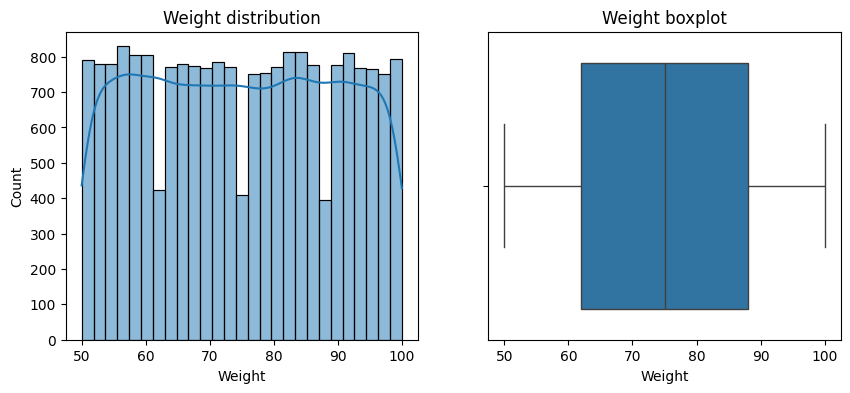

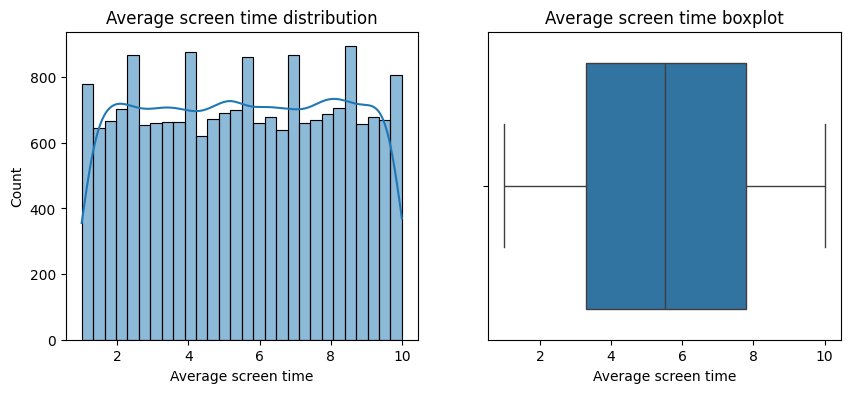

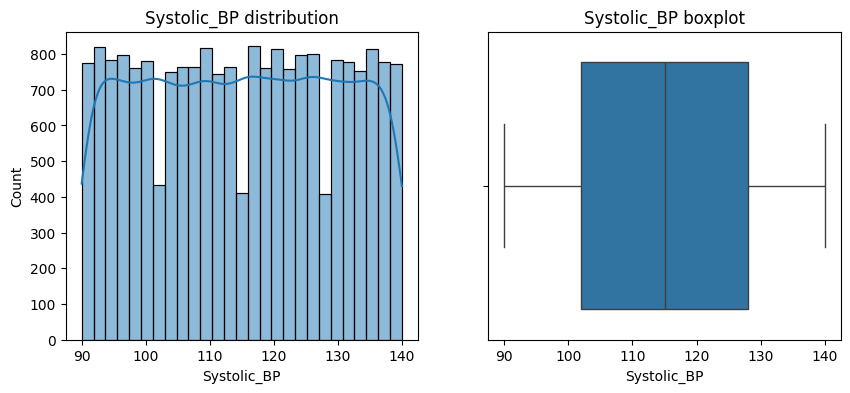

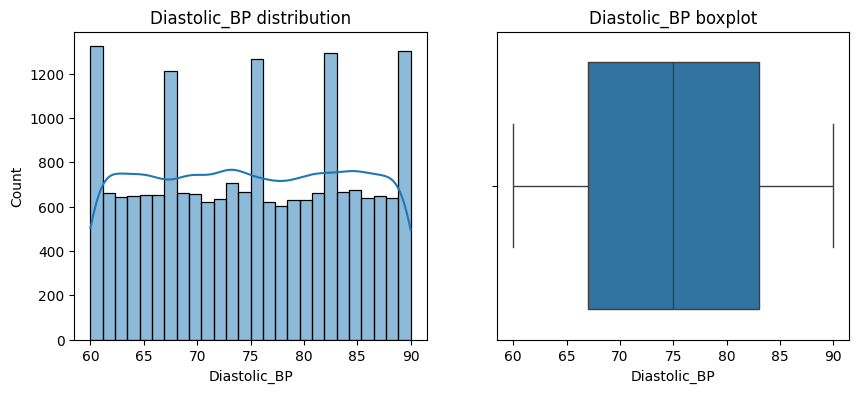

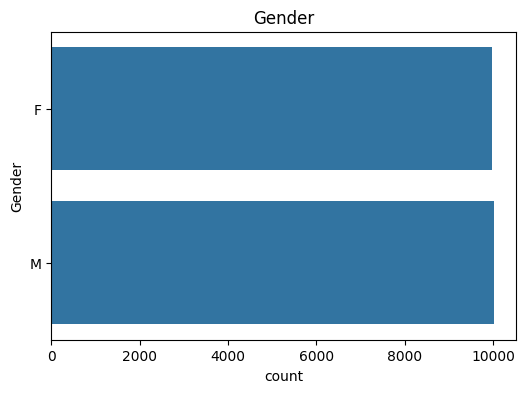

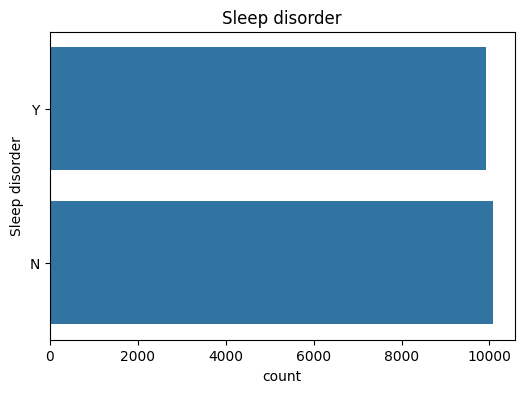

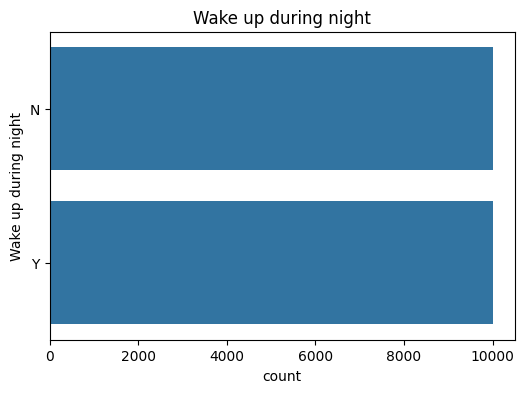

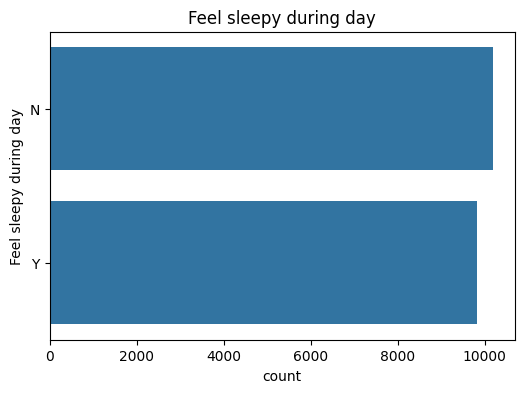

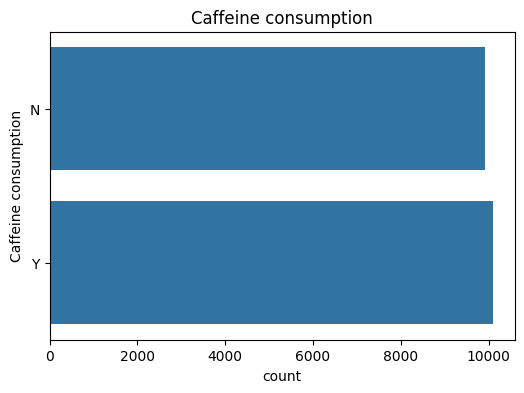

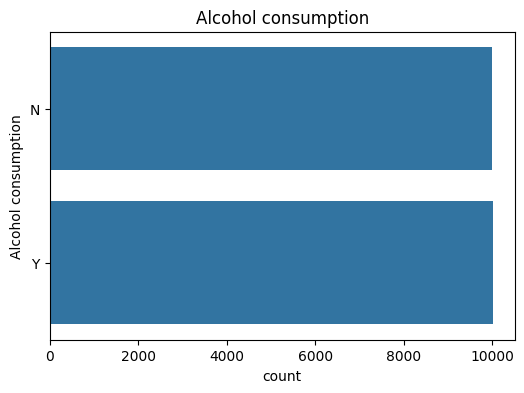

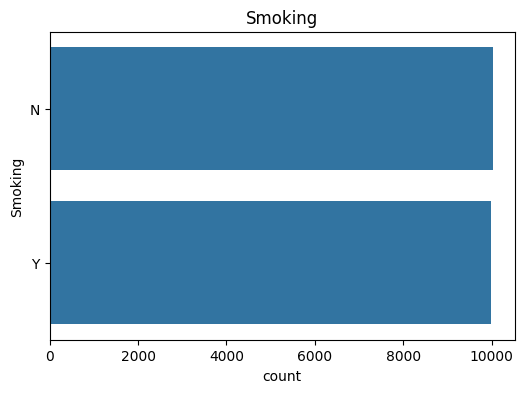

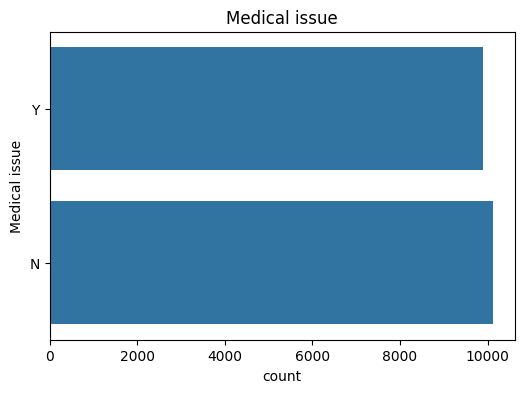

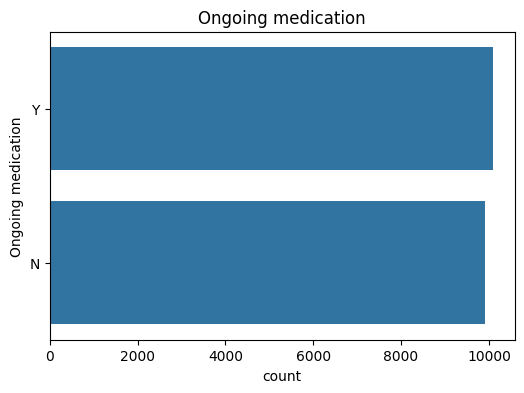

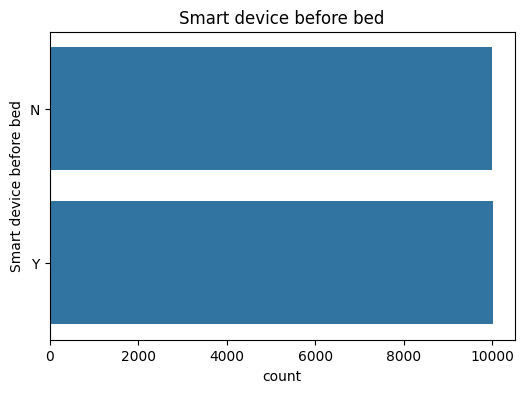

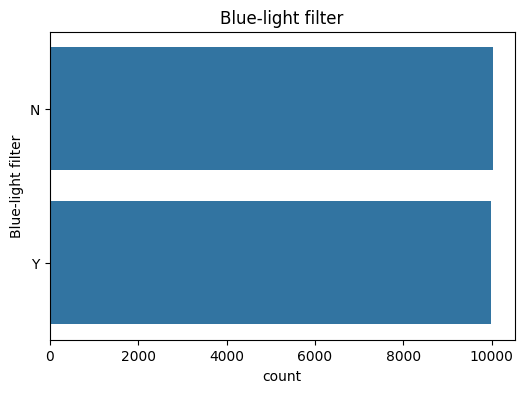

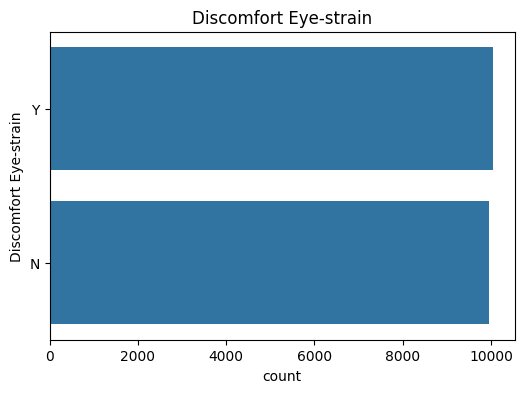

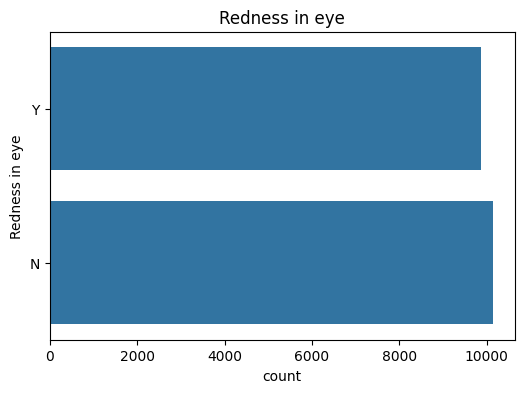

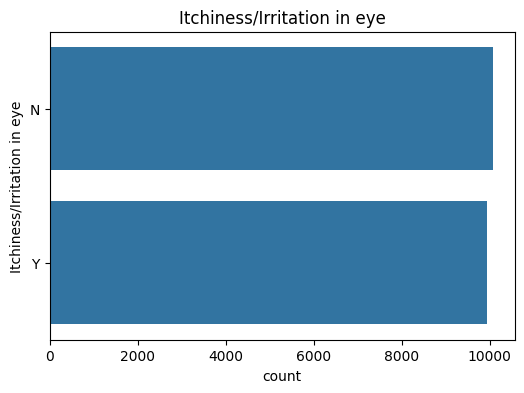

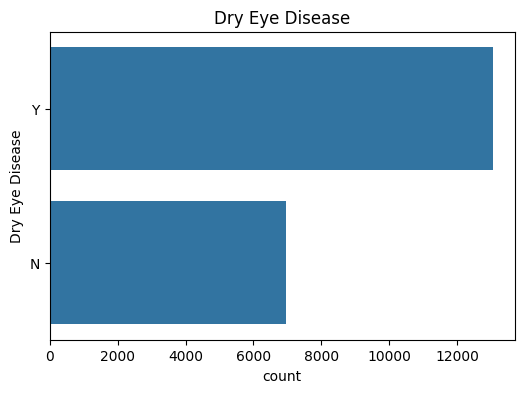

In [4]:
for col in numerical_features:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} distribution")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    plt.show()

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col])
    plt.title(f"{col}")
    plt.show()


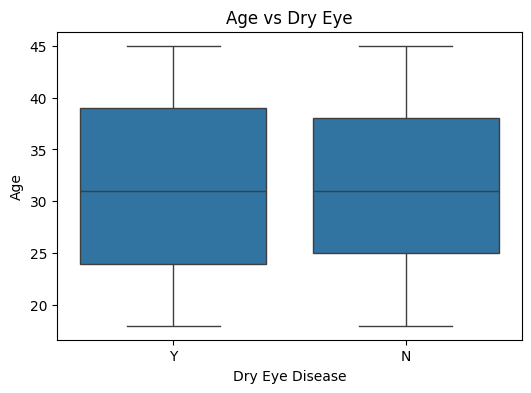

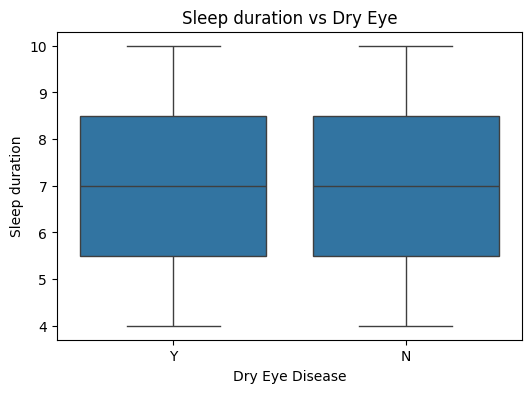

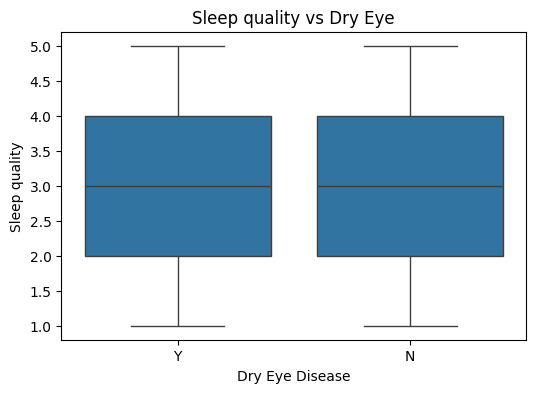

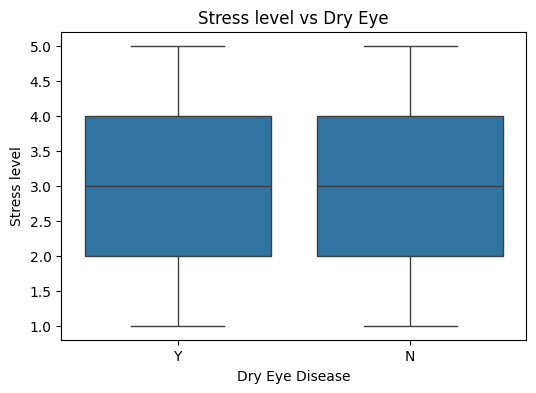

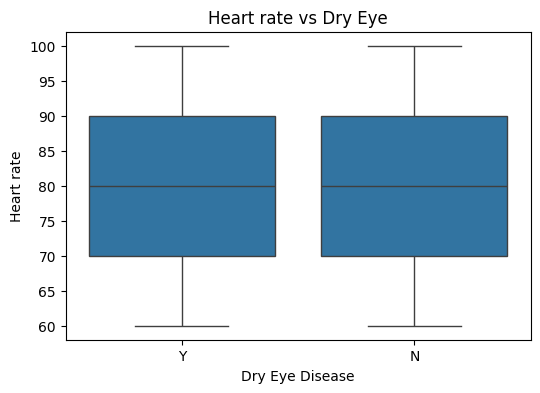

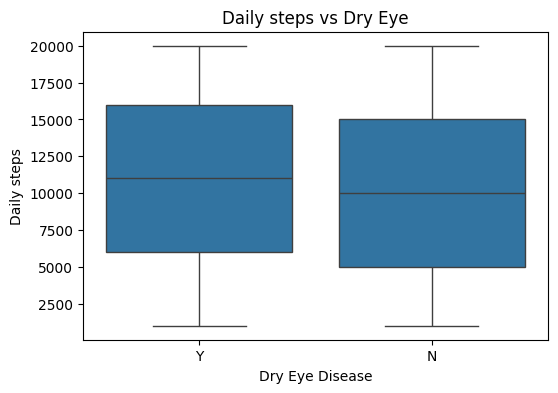

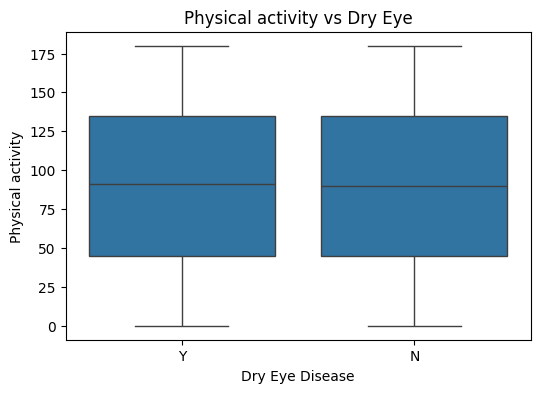

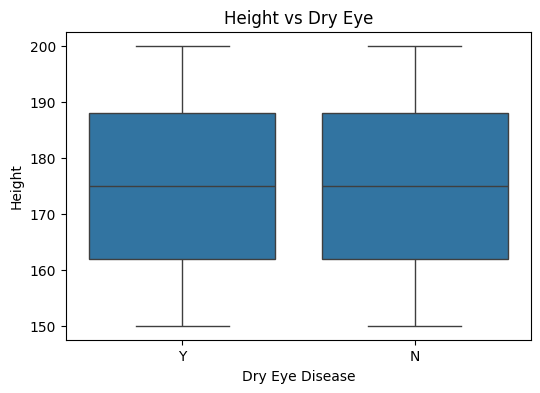

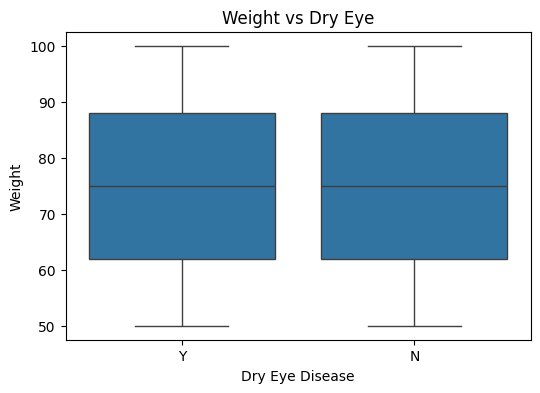

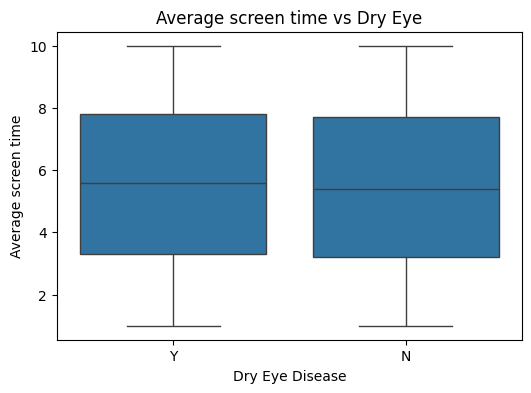

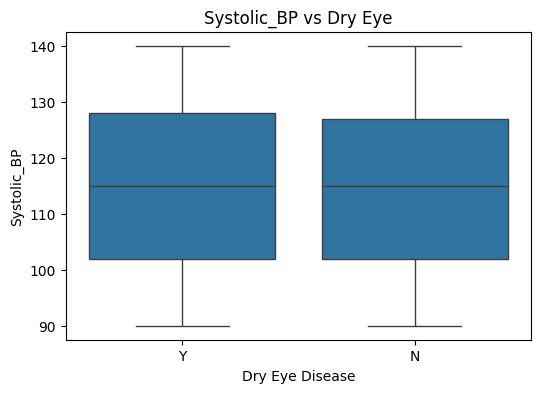

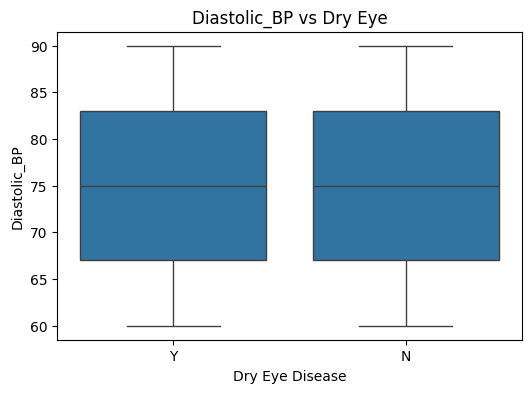

In [5]:
target = 'Dry Eye Disease'

for col in numerical_features:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} vs Dry Eye")
        plt.show()

Dry Eye Disease,N,Y
Gender,,
F,3394,6578
M,3569,6459


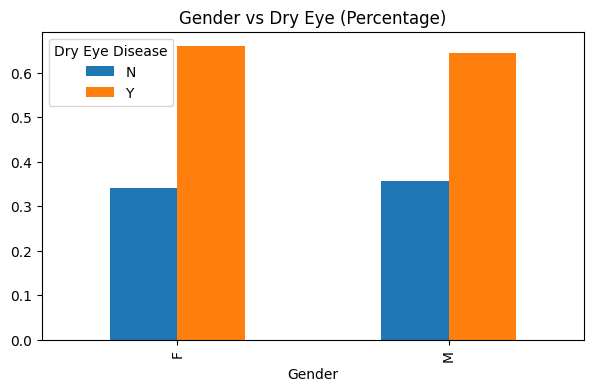

Dry Eye Disease,N,Y
Sleep disorder,,
N,3518,6551
Y,3445,6486


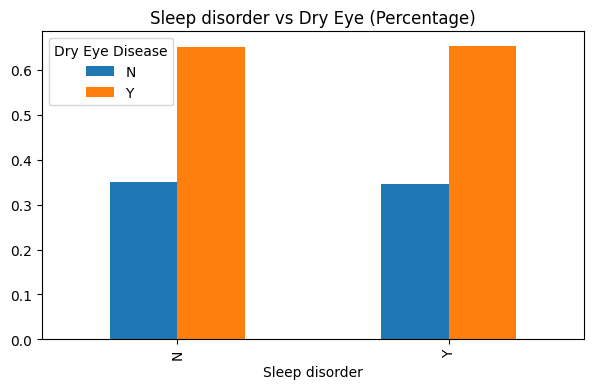

Dry Eye Disease,N,Y
Wake up during night,,
N,3480,6520
Y,3483,6517


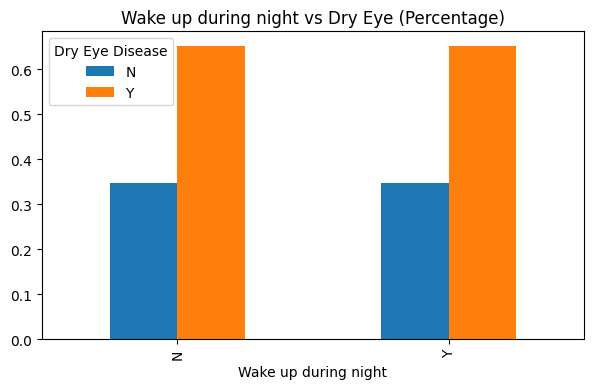

Dry Eye Disease,N,Y
Feel sleepy during day,,
N,3566,6612
Y,3397,6425


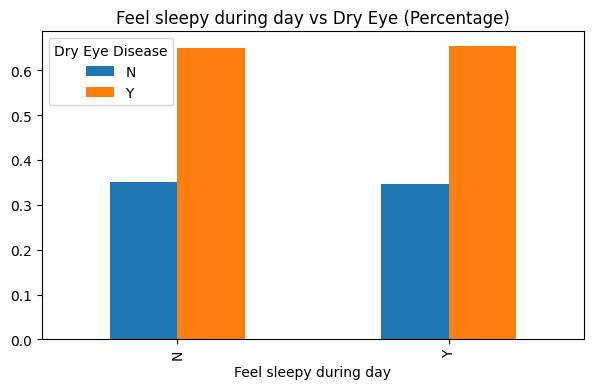

Dry Eye Disease,N,Y
Caffeine consumption,,
N,3464,6447
Y,3499,6590


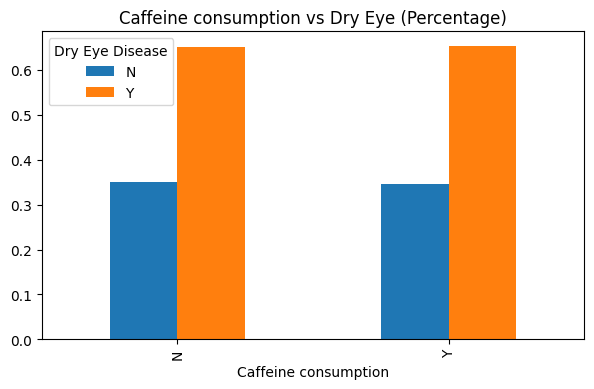

Dry Eye Disease,N,Y
Alcohol consumption,,
N,3532,6459
Y,3431,6578


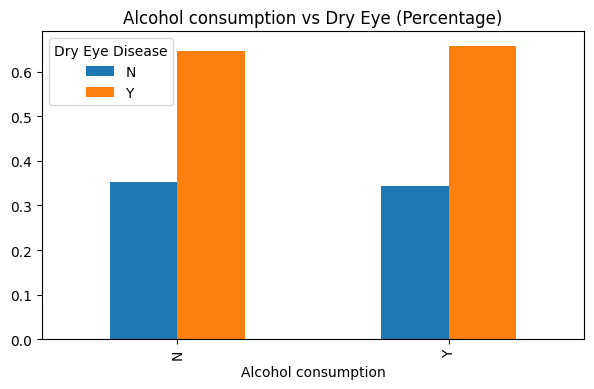

Dry Eye Disease,N,Y
Smoking,,
N,3463,6554
Y,3500,6483


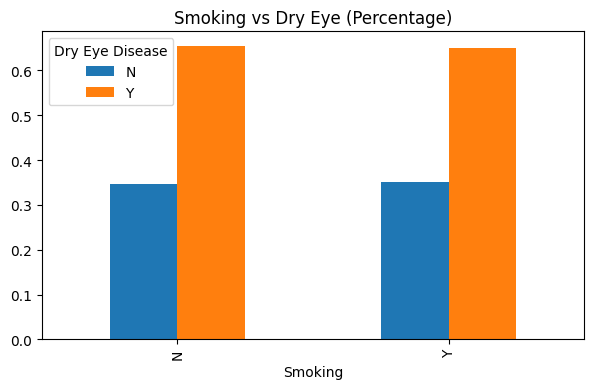

Dry Eye Disease,N,Y
Medical issue,,
N,3515,6596
Y,3448,6441


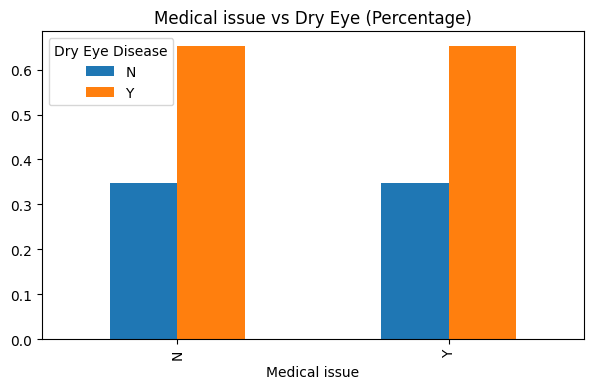

Dry Eye Disease,N,Y
Ongoing medication,,
N,3433,6485
Y,3530,6552


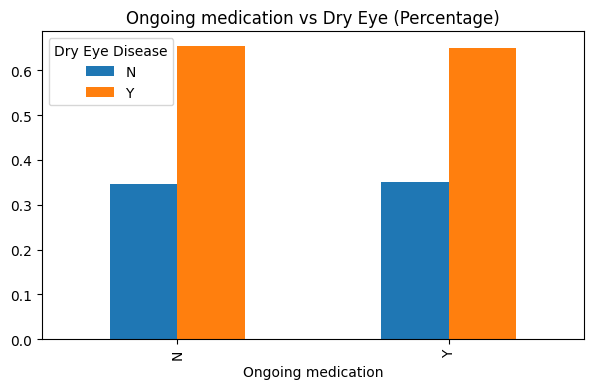

Dry Eye Disease,N,Y
Smart device before bed,,
N,3417,6580
Y,3546,6457


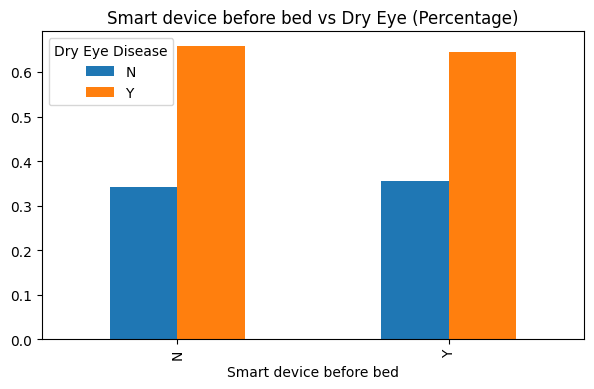

Dry Eye Disease,N,Y
Blue-light filter,,
N,3511,6505
Y,3452,6532


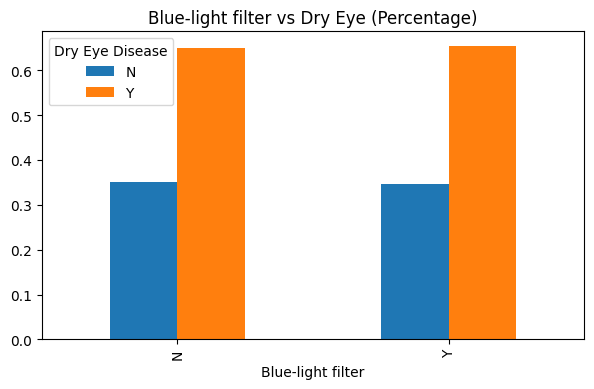

Dry Eye Disease,N,Y
Discomfort Eye-strain,,
N,3992,5971
Y,2971,7066


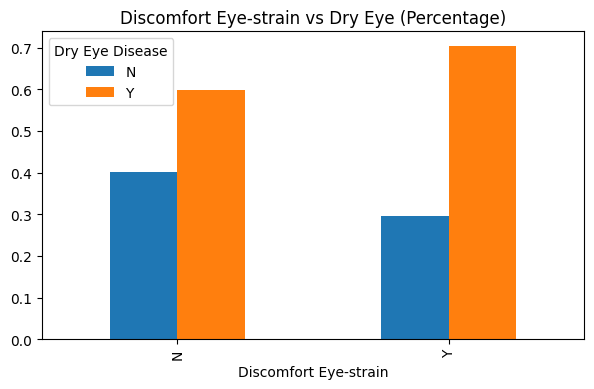

Dry Eye Disease,N,Y
Redness in eye,,
N,4019,6110
Y,2944,6927


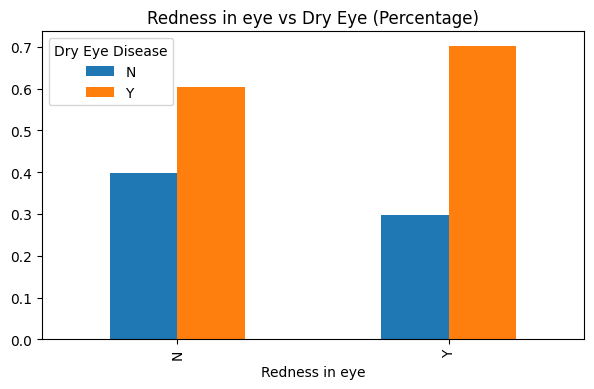

Dry Eye Disease,N,Y
Itchiness/Irritation in eye,,
N,3986,6077
Y,2977,6960


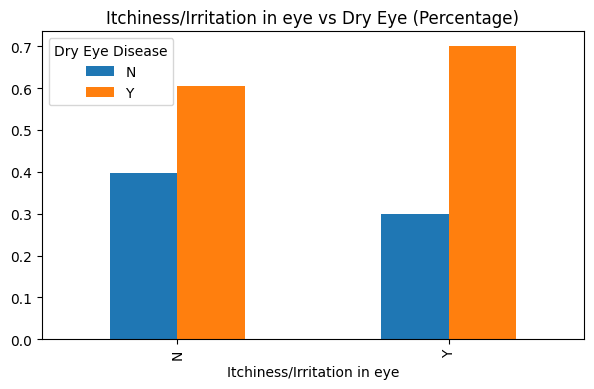

Dry Eye Disease,N,Y
Dry Eye Disease,,
N,6963,0
Y,0,13037


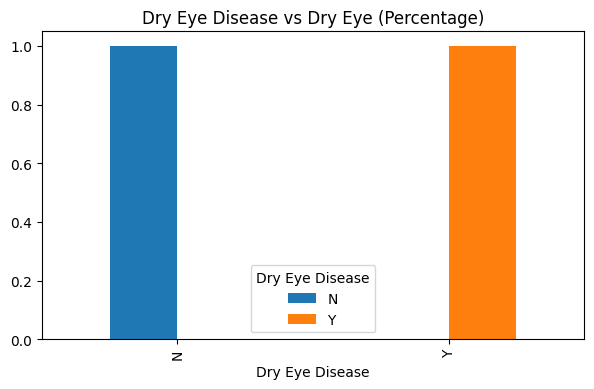

In [6]:
for col in categorical_features:
    ctab = pd.crosstab(df[col], df[target])
    ctab_norm = ctab.div(ctab.sum(1), axis=0)

    display(ctab)
    ctab_norm.plot(kind='bar', figsize=(7,4))
    plt.title(f"{col} vs Dry Eye (Percentage)")
    plt.show()

In [7]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

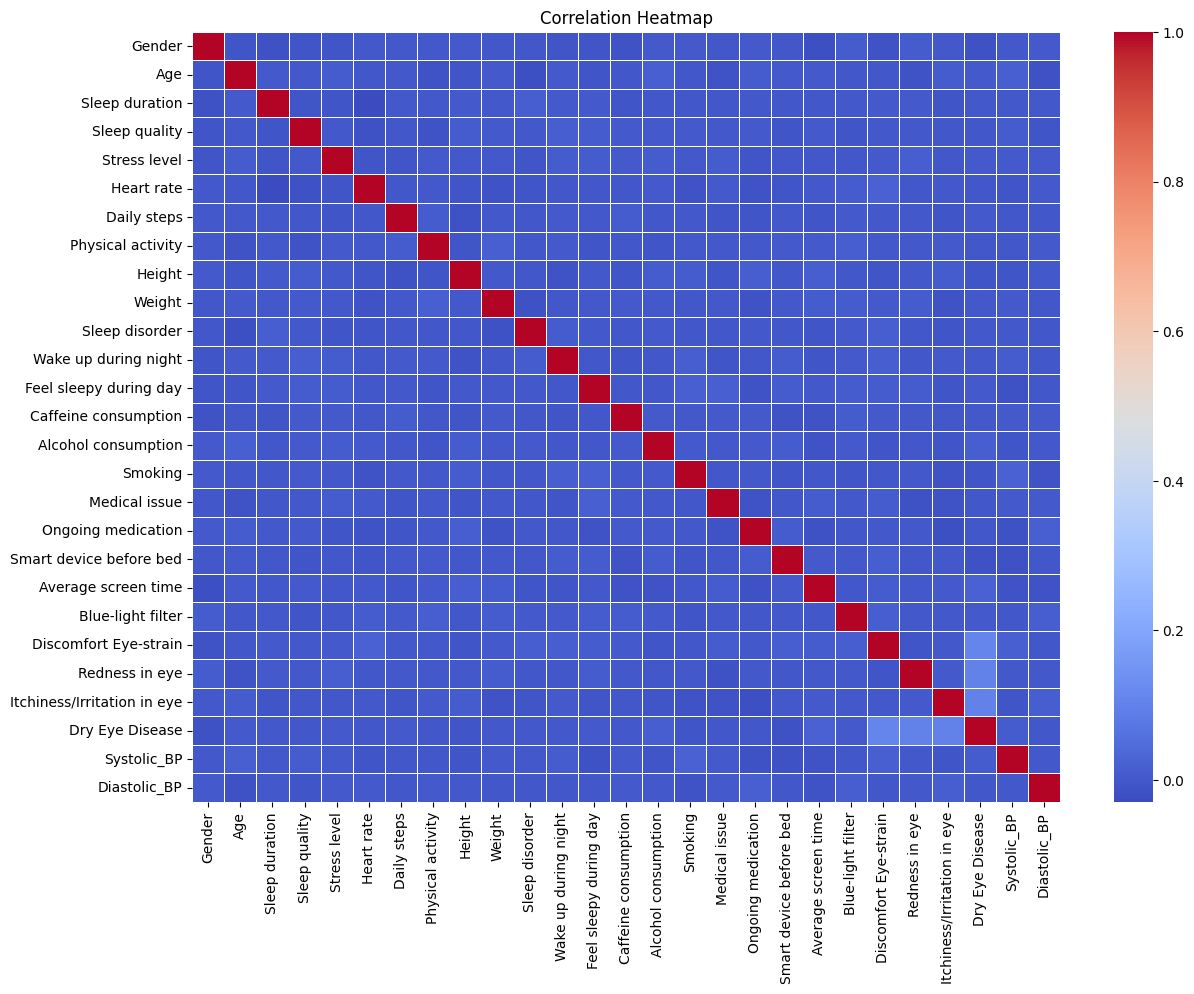

In [8]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# target column
target = "Dry Eye Disease"

# correlation with target
corr_with_target = df.corr()[target].abs().sort_values(ascending=False)

print(corr_with_target)

Dry Eye Disease                1.000000
Discomfort Eye-strain          0.109866
Redness in eye                 0.103410
Itchiness/Irritation in eye    0.101300
Average screen time            0.022490
Gender                         0.016321
Smart device before bed        0.013320
Alcohol consumption            0.011258
Systolic_BP                    0.007289
Height                         0.006437
Daily steps                    0.005664
Stress level                   0.005481
Age                            0.005258
Smoking                        0.005126
Diastolic_BP                   0.005051
Blue-light filter              0.005023
Sleep quality                  0.004990
Feel sleepy during day         0.004730
Ongoing medication             0.004188
Physical activity              0.003289
Caffeine consumption           0.002831
Sleep disorder                 0.002619
Weight                         0.002450
Heart rate                     0.002083
Medical issue                  0.001080
